# Importando Principais Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score, classification_report

### Importando o Dataset

In [ ]:
drive.mount('/content/drive')
path = '/content/drive/MyDrive/output.csv'
df = pd.read_csv(path)

### Descartar todas as colunas que não serão usadas.

In [ ]:
# Drop das colunas com alta taxa de correlação
drop = ['amscPrsovDrivF-2b', 'basBleedLowTempF-1a', 'amscHprsovDrivF-1a', 'basBleedLowTempF-1a', 'bleedOverpressCas-2b', 'bleedFavTmCmd-2a', 'bleedFavTmCmd-2b', 'bleedFavTmFbk-1b', 'bleedHprsovCmdStatus-2a','bleedHprsovCmdStatus-2b','bleedHprsovOpPosStatus-1a']
df = df.drop(columns = drop)

# Matriz de Covariância

### Verficação da correlação das colunas do dataframe.

In [ ]:
# Calcula a matriz de correlação para o DataFrame df e aplica um estilo de gradiente de cores
matriz_corr = df.corr().style.background_gradient(cmap='coolwarm')
matriz_corr

,amscHprsovDrivF-1b,amscHprsovDrivF-2b,amscPrsovDrivF-1a,amscPrsovDrivF-1b,basBleedLowPressF-1a,basBleedLowPressF-2b,basBleedLowTempF-2b,basBleedOverPressF-1a,basBleedOverPressF-2b,basBleedOverTempF-1a,basBleedOverTempF-2b,bleedFavTmCmd-1a,bleedFavTmCmd-1b,bleedFavTmFbk-1a,bleedFavTmFbk-2b,bleedHprsovCmdStatus-1a,bleedHprsovCmdStatus-1b,bleedHprsovOpPosStatus-1b,bleedHprsovOpPosStatus-2a,bleedHprsovOpPosStatus-2b,bleedMonPress-1a,bleedMonPress-1b,bleedMonPress-2a,bleedMonPress-2b,bleedOnStatus-1a,bleedOnStatus-1b,bleedOnStatus-2b,bleedOverpressCas-2a,bleedPrecoolDiffPress-1a,bleedPrecoolDiffPress-1b,bleedPrecoolDiffPress-2a,bleedPrecoolDiffPress-2b,bleedPrsovClPosStatus-1a,bleedPrsovClPosStatus-2a,bleedPrsovFbk-1a,message0422DAA-1,message0418DAA-1
amscHprsovDrivF-1b,1.000000,-0.000223,-0.000430,-0.000446,-0.000098,-0.000098,-0.000139,-0.000139,-0.000139,-0.000170,-0.000231,0.018245,-0.010082,0.009428,0.032143,0.026197,-0.009275,0.027965,0.031343,0.031342,0.002393,0.002361,0.002422,0.002397,0.014298,0.014298,0.014893,-0.000139,0.641620,0.001168,0.001331,0.497778,0.007156,0.005547,0.021779,-0.000556,-0.000450
amscHprsovDrivF-2b,-0.000223,1.000000,-0.000997,-0.001034,0.042704,0.042704,-0.000316,0.030040,0.030040,0.024400,-0.000523,-0.018787,-0.021753,-0.021102,0.121740,-0.020353,-0.020347,-0.066734,-0.067673,-0.067674,-0.127057,-0.127031,-0.129211,-0.123626,-0.045514,-0.045514,-0.044711,-0.000316,-0.031064,-0.005140,-0.054333,-0.001733,0.058875,-0.015298,-0.018384,-0.001264,-0.001024
amscPrsovDrivF-1a,-0.000430,-0.000997,1.000000,0.980973,-0.000430,-0.000430,-0.000621,-0.000614,-0.000614,-0.000755,-0.001033,-0.024974,-0.030745,-0.024512,0.029242,-0.035065,-0.040013,-0.123824,0.055676,0.055672,-0.047856,-0.048289,-0.000634,-0.000671,-0.070871,-0.070872,0.010090,-0.000620,-0.043044,-0.057948,0.074379,0.046678,0.295166,0.026323,-0.025260,0.002580,0.335134
amscPrsovDrivF-1b,-0.000446,-0.001034,0.980973,1.000000,-0.000454,-0.000454,-0.000644,-0.000643,-0.000643,-0.000787,-0.001070,-0.023463,-0.028655,-0.021675,0.026319,-0.031950,-0.040851,-0.120116,0.055885,0.055882,-0.047449,-0.047878,-0.002332,-0.002361,-0.070820,-0.070822,0.008521,-0.000643,-0.042481,-0.057144,0.072402,0.045407,0.289916,0.026412,-0.024051,0.002405,0.328281
basBleedLowPressF-1a,-0.000098,0.042704,-0.000430,-0.000454,1.000000,1.000000,-0.000139,0.707072,0.707072,0.577294,-0.000176,-0.008259,0.017464,0.006785,-0.009568,-0.008947,0.008250,-0.001155,-0.002253,-0.002251,0.002393,0.027653,0.002422,0.113209,-0.004396,-0.004396,-0.004713,-0.000139,0.000155,0.844683,-0.001385,0.762042,-0.001595,-0.000626,-0.008090,-0.000556,-0.000450
basBleedLowPressF-2b,-0.000098,0.042704,-0.000430,-0.000454,1.000000,1.000000,-0.000139,0.707072,0.707072,0.577294,-0.000176,-0.008259,0.017464,0.006785,-0.009568,-0.008947,0.008250,-0.001155,-0.002253,-0.002251,0.002393,0.027653,0.002422,0.113209,-0.004396,-0.004396,-0.004713,-0.000139,0.000155,0.844683,-0.001385,0.762042,-0.001595,-0.000626,-0.008090,-0.000556,-0.000450
basBleedLowTempF-2b,-0.000139,-0.000316,-0.000621,-0.000644,-0.000139,-0.000139,1.000000,0.001605,-0.000197,0.001231,-0.000327,0.013272,-0.014284,0.016806,0.013618,0.017610,-0.013140,0.007338,-0.019685,-0.019685,0.003390,0.003563,0.003431,0.003396,0.000147,0.000147,-0.008752,-0.000197,0.005167,0.004797,-0.001507,-0.000764,-0.002698,0.027516,0.014379,0.249620,-0.000638
basBleedOverPressF-1a,-0.000139,0.030040,-0.000614,-0.000643,0.707072,0.707072,0.001605,1.000000,0.499902,0.816457,-0.000249,-0.001238,0.005220,0.037483,0.001504,0.001625,-0.000724,0.001534,0.001387,0.001386,0.003384,0.081656,0.003425,0.081750,-0.006030,-0.006030,-0.006168,-0.000196,0.057389,0.599642,0.003803,0.628791,-0.002380,-0.002060,-0.002152,-0.000786,-0.000636
basBleedOverPressF-2b,-0.000139,0.030040,-0.000614,-0.000643,0.707072,0.707072,-0.000197,0.499902,1.000000,0.816457,-0.000249,-0.011682,0.018978,-0.002042,-0.013532,-0.012653,0.013051,0.000690,-0.001043,-0.001042,0.003384,0.099099,0.003425,0.081750,0.

# Treino e Separação do Modelo

### Divisão da parte x e y para teste e treino.

In [ ]:
# Separação dos dados em características (x) e rótulos (y)
x = df.drop(columns=['message0418DAA-1', 'message0422DAA-1'])  # Substitua pelos nomes das colunas adequados
y = df[['message0418DAA-1', 'message0422DAA-1']]  # Substitua pelos nomes das colunas adequados

In [ ]:
# Divisão dos dados em conjuntos de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=32)

In [ ]:
# Crie uma instância do StandardScaler
scaler = StandardScaler()

# Ajuste o scaler apenas aos dados de características (x_train)
x_train_normalized = scaler.fit_transform(x_train)

# Aplique o mesmo scaler aos dados de teste (x_test)
x_test_normalized = scaler.transform(x_test)

# Modelo - Árvore de Decisão

In [ ]:
# Criação do modelo de Árvore de Decisão
model = DecisionTreeClassifier(random_state=42)

# Treinamento do modelo
model.fit(x_train, y_train)

# Fazendo previsões
y_pred = model.predict(x_test)

# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy}')

# Relatório de classificação
report = classification_report(y_test, y_pred)
print(report)

Acurácia: 0.9960771493952272
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.45      0.62      0.53         8

   micro avg       0.56      0.64      0.60        14
   macro avg       0.63      0.65      0.63        14
weighted avg       0.60      0.64      0.61        14
 samples avg       0.00      0.00      0.00        14



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Analogia e análise



- Acurácia:  A acurácia é como medir quantas vezes seus dardos realmente atingem o alvo em relação ao número total de dardos lançados

- Precisão : A precisão é como medir quantos dos dardos que você atira atingem o alvo, mas também considera quantos deles caem perto do alvo, mas não dentro dele

- Revocação : É como medir quantos dardos atingem o alvo em relação a todos os dardos que você deveria ter atirado no alvo. Se você tinha a intenção de lançar 10 dardos no alvo, mas só lançou 6, e todos os 6 atingiram o alvo, sua revocação é de 100%. Isso reflete quão bom você é em não perder o alvo quando deveria atirá-lo.

- f1-score : O F1-Score é uma medida que equilibra precisão e revocação. É como avaliar o quão bem você equilibra acertar o alvo com precisão e não perder o alvo quando deveria.

Acurácia: 0.9960771493952272


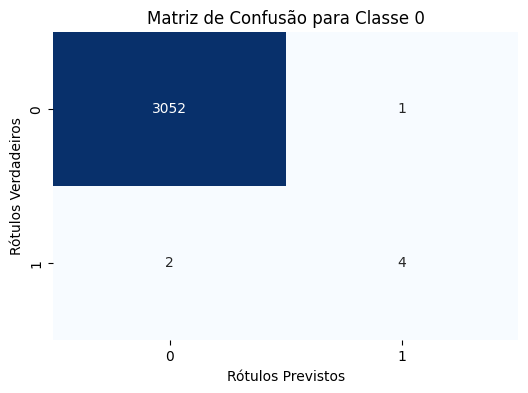

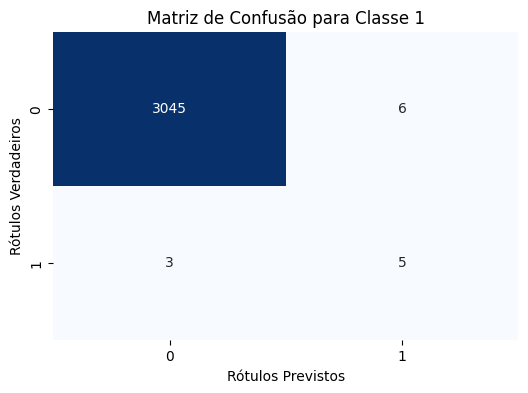

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

# Fazendo previsões
y_pred = model.predict(x_test)

# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy}')

# Matriz de Confusão para cada classe
mcm = multilabel_confusion_matrix(y_test, y_pred)

# Plote as matrizes de confusão para cada classe
for i, cm in enumerate(mcm):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Rótulos Previstos')
    plt.ylabel('Rótulos Verdadeiros')
    plt.title(f'Matriz de Confusão para Classe {i}')
    plt.show()



- A matriz de confusão é uma ferramenta que ajuda a avaliar o desempenho de um modelo de machine learning em problemas de classificação. Ela compara as previsões feitas pelo modelo com os valores reais dos dados de teste e mostra quantos acertos e erros ocorreram.

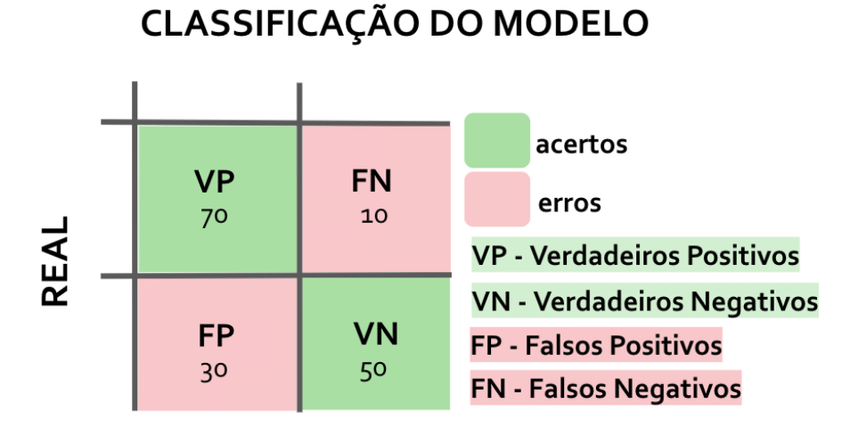

## Utilização do pycaret para comparação de resultados de Modelos.

In [ ]:
!pip3 install pycaret[full]
from pycaret.regression import *

### Definindo o target.

In [ ]:
s = setup(
    data=df,
    target='message0418DAA-1',
)

## Resultado da comparação dos modelos.

In [ ]:
melhor_modelo = compare_models()

In [ ]:
melhor_modelo

In [ ]:
evaluate_model(melhor_modelo)

### Salvando o modelo na memória da máquina para a criação da API em FastAPI.

In [ ]:
# Salvar o Modelo
save_model(melhor_modelo, 'modelo')

In [ ]:
create_api(melhor_modelo, 'minha_api')